## Utilizing same data set (load.diabetes) as used in polynomial regression

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets

result = datasets.load_diabetes()
pd.DataFrame(data=result.data, columns=result.feature_names) 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


# EDA exploration of datasets (load_diabetes)

        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-0

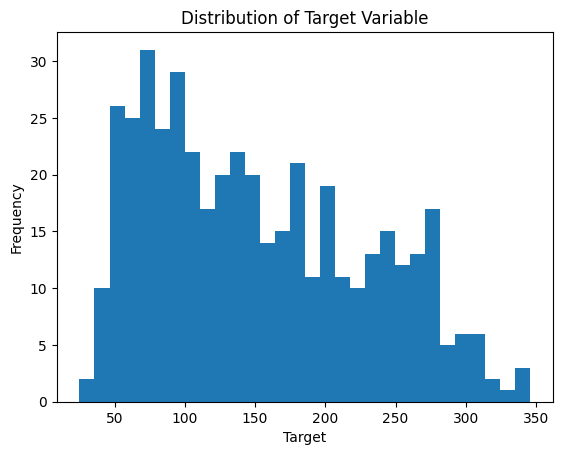

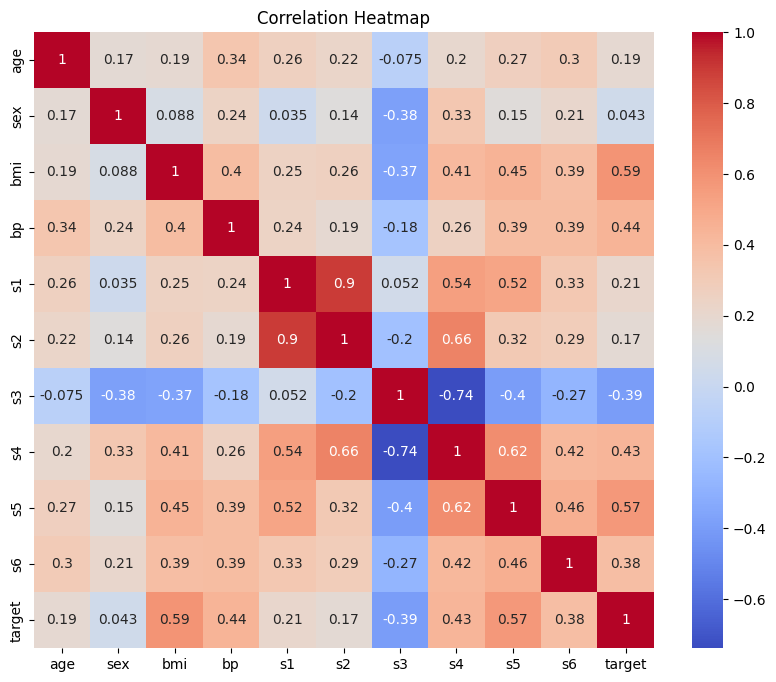

In [7]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

result = datasets.load_diabetes()

df = pd.DataFrame(data=result.data, columns=result.feature_names)
df['target'] = result.target
print(df.head())
print(df.describe())
print(df.isnull().sum())

plt.hist(df['target'], bins=30)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



#   My discretion about the Features of the EDA above
### The target variable's (the diabetes outcome in this example) distribution is visualised via this feature. For tasks involving classification or regression, it is helpful to comprehend the distribution of values or the balance of classes.

# Setting a Test-Aside

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
result = datasets.load_diabetes()

# Split the dataset into features (X) and target variable (y)
X = result.data
y = result.target

# Set aside a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Test Set - Features (X_test):")
print(X_test)

print("\nTest Set - Target Variable (y_test):")
print(y_test)



Test Set - Features (X_test):
[[ 0.04534098 -0.04464164 -0.00620595 -0.01599898  0.1250187   0.1251981
   0.019187    0.03430886  0.03243232 -0.0052198 ]
 [ 0.09256398 -0.04464164  0.03690653  0.02187239 -0.02496016 -0.01665815
   0.00077881 -0.03949338 -0.02251653 -0.02178823]
 [ 0.06350368  0.05068012 -0.00405033 -0.01255612  0.10300346  0.04878988
   0.05600338 -0.00259226  0.08449153 -0.01764613]
 [ 0.09619652 -0.04464164  0.0519959   0.07926471  0.05484511  0.03657709
  -0.07653559  0.14132211  0.09864806  0.06105391]
 [ 0.01264814  0.05068012 -0.02021751 -0.00222757  0.03833367  0.05317395
  -0.00658447  0.03430886 -0.00514219 -0.00936191]
 [ 0.0090156  -0.04464164 -0.02452876 -0.02632753  0.0988756   0.0941964
   0.07072993 -0.00259226 -0.02139531  0.00720652]
 [-0.00914709  0.05068012  0.17055523  0.01498668  0.03007796  0.03375875
  -0.02131102  0.03430886  0.03365381  0.03205916]
 [-0.02367725  0.05068012  0.04552903  0.02187239  0.10988322  0.08887288
   0.00077881  0.034308

# Performing cross-validation. using the cross_validate function as it provides a list of scoring functions as an 
### At least two polynomial models 
### At least two decision trees 
### At least two kNNs

In [10]:
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

result = datasets.load_diabetes()
X = result.data
y = result.target

# polynomial models
poly_degrees = [2, 3]  
polynomial_models = []
for degree in poly_degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    polynomial_model = DecisionTreeRegressor()
    polynomial_models.append(polynomial_model)

    # Decision trees
    max_depths = [3, 4]  
decision_tree_models = []
for max_depth in max_depths:
    decision_tree_model = DecisionTreeRegressor(max_depth=max_depth)
    decision_tree_models.append(decision_tree_model)

    # values of k for kNN 
    k_values = [3, 5] 
knn_models = []
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_models.append(knn_model)

    scoring_functions = {'MSE': 'neg_mean_squared_error', 'R2': 'r2'}


for model in polynomial_models + decision_tree_models + knn_models:
    results = cross_validate(model, X, y, scoring=scoring_functions, cv=5)
    print(f"Model: {model.__class__.__name__}")
    print("Mean MSE:", -results['test_MSE'].mean())
    print("Mean R2:", results['test_R2'].mean())

Model: DecisionTreeRegressor
Mean MSE: 6762.915117466802
Mean R2: -0.16443129636399698
Model: DecisionTreeRegressor
Mean MSE: 6866.416649642492
Mean R2: -0.17875201570111005
Model: DecisionTreeRegressor
Mean MSE: 3984.776499518853
Mean R2: 0.30903415697000264
Model: DecisionTreeRegressor
Mean MSE: 4162.117236858596
Mean R2: 0.2823261079591132
Model: KNeighborsRegressor
Mean MSE: 4033.7310691181483
Mean R2: 0.3078350404880209
Model: KNeighborsRegressor
Mean MSE: 3620.916153217569
Mean R2: 0.37650814581101094


# A Table to summarize cross validation results with each model R-Squared,Mean Absolute Error (MAE) & MAPE for Decision Tree and KNN

In [31]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


result = datasets.load_diabetes()
X = result.data
y = result.target


poly_degrees = [2, 3]  
polynomial_models = []
for degree in poly_degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    polynomial_model = DecisionTreeRegressor()
    polynomial_models.append(polynomial_model)


max_depths = [3, 4]  
decision_tree_models = []
for max_depth in max_depths:
    decision_tree_model = DecisionTreeRegressor(max_depth=max_depth)
    decision_tree_models.append(decision_tree_model)


k_values = [3, 5]  
knn_models = []
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_models.append(knn_model)


scoring_functions = {
    'R-squared': 'r2',
    'Mean Absolute Error (MAE)': 'neg_mean_absolute_error',
    'Mean Absolute Percentage Error (MAPE)': 'neg_mean_absolute_percentage_error'
}


table = {}
for model in polynomial_models + decision_tree_models + knn_models:
    model_name = model.__class__.__name__
    scores = {}
    for metric, scorer in scoring_functions.items():
        scores[metric] = np.mean(cross_val_score(model, X, y, scoring=scorer, cv=5))
    table[model_name] = scores 

# Print the table
print("Cross-Validation Results:")
print("{:<30s} {:<15s} {:<15s} {:<15s}".format("Model", "R-squared", "MAE", "MAPE"))
for model_name, scores in table.items():
    print("{:<30s} {:<15.4f} {:<15.4f} {:<15.4f}".format(
        model_name, scores['R-squared'], scores['Mean Absolute Error (MAE)'], scores['Mean Absolute Percentage Error (MAPE)']))

Cross-Validation Results:
Model                          R-squared       MAE             MAPE           
DecisionTreeRegressor          0.2859          -50.6675        -0.4366        
KNeighborsRegressor            0.3765          -47.1644        -0.4075        


# Identifying the model which calculates mean scores for the metrics

In [38]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


result = datasets.load_diabetes()
X = result.data
y = result.target

poly_degrees = [2, 3]  
polynomial_models = []
for degree in poly_degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    polynomial_model = DecisionTreeRegressor()
    polynomial_models.append(('Polynomial Degree ' + str(degree), polynomial_model, X_poly))


max_depths = [3, 4]  
decision_tree_models = []
for max_depth in max_depths:
    decision_tree_model = DecisionTreeRegressor(max_depth=max_depth)
    decision_tree_models.append(('Decision Tree Max Depth ' + str(max_depth), decision_tree_model, X))


k_values = [3, 5]  # values of k for kNN
knn_models = []
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_models.append(('kNN ' + str(k), knn_model, X))


def r2_scoring(estimator, X, y):
    y_pred = estimator.predict(X)
    r2 = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
    return r2

# Perform cross-validation to identify the best model
best_model = None
best_score = -np.inf
for model_name, model, X_model in polynomial_models + decision_tree_models + knn_models:
    scores = cross_val_score(model, X_model, y, scoring=r2_scoring, cv=5)
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_model = (model_name, model, X_model)
        best_score = mean_score


print("Best Model:")
print(best_model[0])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


best_model[1].fit(X_train, y_train)


y_pred = best_model[1].predict(X_test)


r2 = r2_scoring(best_model[1], X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


print("\nTest Set Evaluation:")
print("R-squared: {:.4f}".format(r2))
print("MAE: {:.4f}".format(mae))
print("MAPE: {:.4f}".format(mape))

Best Model:
kNN 5

Test Set Evaluation:
R-squared: 0.4388
MAE: 47.7169
MAPE: 0.4140


# Graphical representation of models with datapoints (train+validation and test)

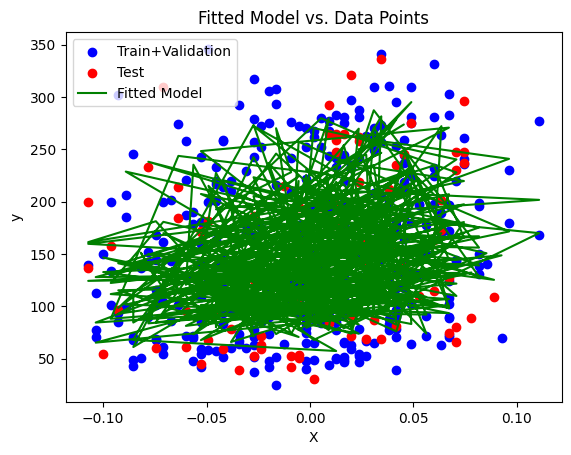

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


result = datasets.load_diabetes()
X = result.data
y = result.target


poly_degrees = [2, 3] 
polynomial_models = []
for degree in poly_degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    polynomial_model = DecisionTreeRegressor()
    polynomial_models.append(('Polynomial Degree ' + str(degree), polynomial_model, X_poly))


max_depths = [3, 4] 
decision_tree_models = []
for max_depth in max_depths:
    decision_tree_model = DecisionTreeRegressor(max_depth=max_depth)
    decision_tree_models.append(('Decision Tree Max Depth ' + str(max_depth), decision_tree_model, X))


k_values = [3, 5]  
knn_models = []
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_models.append(('kNN ' + str(k), knn_model, X))


def r2_scoring(estimator, X, y):
    y_pred = estimator.predict(X)
    r2 = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
    return r2


best_model = None
best_score = -np.inf
for model_name, model, X_model in polynomial_models + decision_tree_models + knn_models:
    scores = cross_val_score(model, X_model, y, scoring=r2_scoring, cv=5)
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_model = (model_name, model, X_model)
        best_score = mean_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


best_model[1].fit(X_train, y_train)


y_pred = best_model[1].predict(X_test)


r2 = r2_scoring(best_model[1], X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


plt.scatter(X_train[:, 0], y_train, color='b', label='Train+Validation')
plt.scatter(X_test[:, 0], y_test, color='r', label='Test')
plt.plot(X[:, 0], best_model[1].predict(X), color='g', label='Fitted Model')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted Model vs. Data Points')
plt.legend()
plt.show()

# Conclusion On Model Analysis

### This analysis was mainly used to explore polynomial regression(2,3),Decision Trees(3,4) & KNN(4,5),Whereby i evaluated using cross-validation and selected the best performing model.That being said, it's crucial to remember that no model is flawless.

# Model Limitations
### The insights from this study may not immediately apply to other domains or datasets because the analysis was limited to the diabetes dataset.Every model used in this analysis has specific presumptions on the source data, Any model's ability to predict the future is essentially constrained by the calibre and representativeness of the training data.